# Regressão Linear Aplicada a previsão do impacto do despacho de usina Termoelétrica sob Custo Marginal De Operação

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr

## Recebendo o arquivo no modelo .csv

In [2]:
dataset = pd.read_csv('Simples_Geração_de_Energia_Barra_Semana_data.csv', sep= ';', header = None)


### Visualizando os dados do dataframe:

In [3]:
dataset.head()

,0,1,2
0,02/01/2016,"937,67","27,8"
1,09/01/2016,"1009,05","20,64"
2,16/01/2016,"840,08","12,6"
3,23/01/2016,"839,19","9,66"
4,30/01/2016,"764,1","6,07"


### Visualizando a informação do dataframe: 

In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       269 non-null    object
 1   1       269 non-null    object
 2   2       269 non-null    object
dtypes: object(3)
memory usage: 6.4+ KB


In [5]:
dataset.describe()

,0,1,2
count,269,269,269
unique,269,269,263
top,02/09/2017,"420,73",0
freq,1,1,5


### Inserindo os nomes das colunas

In [6]:
dataset.columns = ["Semana Operativa", "Ger_Term", "cmo"]

In [7]:
dataset.head()

,Semana Operativa,Ger_Term,cmo
0,02/01/2016,"937,67","27,8"
1,09/01/2016,"1009,05","20,64"
2,16/01/2016,"840,08","12,6"
3,23/01/2016,"839,19","9,66"
4,30/01/2016,"764,1","6,07"


### Tratando os dados / Formatando

In [8]:
dataset['Ger_Term'] = dataset['Ger_Term'].str.replace(',', '.').astype(float)


In [9]:
dataset['cmo'] = dataset['cmo'].str.replace(',', '.').astype(float)

In [10]:
dataset.head()

,Semana Operativa,Ger_Term,cmo
0,02/01/2016,937.67,27.80
1,09/01/2016,1009.05,20.64
2,16/01/2016,840.08,12.60
3,23/01/2016,839.19,9.66
4,30/01/2016,764.10,6.07


In [11]:
from sklearn.preprocessing import StandardScaler
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values
scaler = StandardScaler()
X_norm = scaler.fit(X)
X_norm = scaler.transform(X)
y_norm = scaler.fit(y)
y_norm = scaler.transform(y)

## Medindo a correlação entre as váriaveis


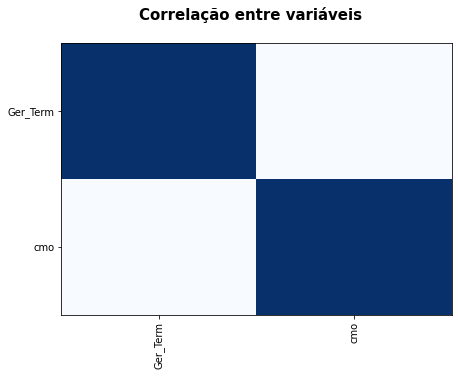

In [12]:
corr = dataset.corr()
plt.figure(figsize=(7,5))
plt.imshow(corr, cmap= 'Blues', interpolation='none', aspect= 'auto')
plt.colorbar
plt.xticks(range(len(corr)), corr.columns, rotation= 'vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlação entre variáveis', fontsize = 15, fontweight = 'bold')
plt.grid(False)
plt.show()

### Na tabela acima pode-se inferir que a correlação entre as variáveis, em todo o dataset, é muito fraca.

Text(0.95, 0.95, 'média = 229.93\nmáximo = 1419.80')

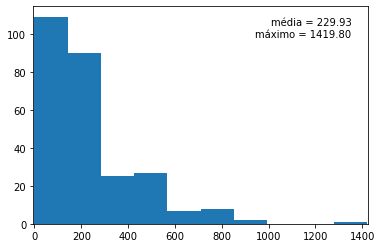

In [13]:
import matplotlib.pyplot as plt
plt.hist(dataset['cmo'], bins= 10 ) 
#dataset['cmo'].hist(bins =10)
plt.xlim([min(dataset['cmo'])-5, max(dataset['cmo'])+5])
ax = plt.gca()
text = 'média = %.2f\nmáximo = %.2f' % (dataset['cmo'].mean(), max(dataset['cmo']))
plt.text(0.95, 0.95, text, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

Text(0.95, 0.95, 'média = 745.47\nmáximo = 1268.16')

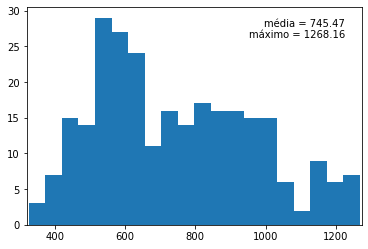

In [14]:
import matplotlib.pyplot as plt
plt.hist(dataset['Ger_Term'], bins= 20 ) 
#dataset['cmo'].hist(bins =10)
plt.xlim([min(dataset['Ger_Term'])-5, max(dataset['Ger_Term'])+5])
ax = plt.gca()
text = 'média = %.2f\nmáximo = %.2f' % (dataset['Ger_Term'].mean(), max(dataset['Ger_Term']))
plt.text(0.95, 0.95, text, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

### A seguir encontramos a semana e o valor do Custo Marginal de Operação para o maior valor de geração termoelétrica 

In [15]:
dataset[dataset['Ger_Term'] == max(dataset['Ger_Term'])]

,Semana Operativa,Ger_Term,cmo
89,16/09/2017,1268.16,599.9


### A seguir encontramos a semana e o valor de GW de geração termoelétrica para o maior  valor do Custo Marginal de Operação

In [16]:
dataset[dataset['cmo'] == max(dataset['cmo'])]

,Semana Operativa,Ger_Term,cmo
92,07/10/2017,1234.28,1419.8


### A seguir encontramos os valores do custo marginal de operação menores que a média do CMO para o período

In [17]:
dataset[dataset['cmo'] >= (dataset['cmo'].mean())].count()

Semana Operativa    92
Ger_Term            92
cmo                 92
dtype: int64

### Apresentamos o gráfico de frequência das amostras sendo ajustados por uma curva normal

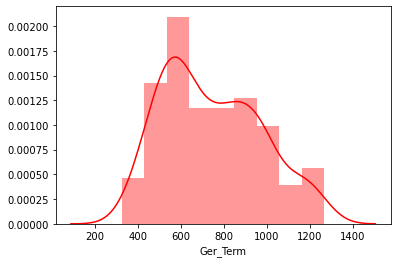

In [18]:
import seaborn as sns
ax = sns.distplot(dataset['Ger_Term'], color = 'r')

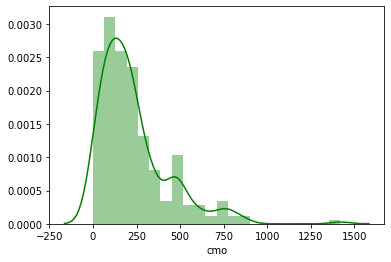

In [19]:
ax = sns.distplot(dataset['cmo'], color = 'g')

## A seguir mostraremos ao autocorrelação das variáveis do dataset
### Definiu-se um lag de 60 semanas operativas

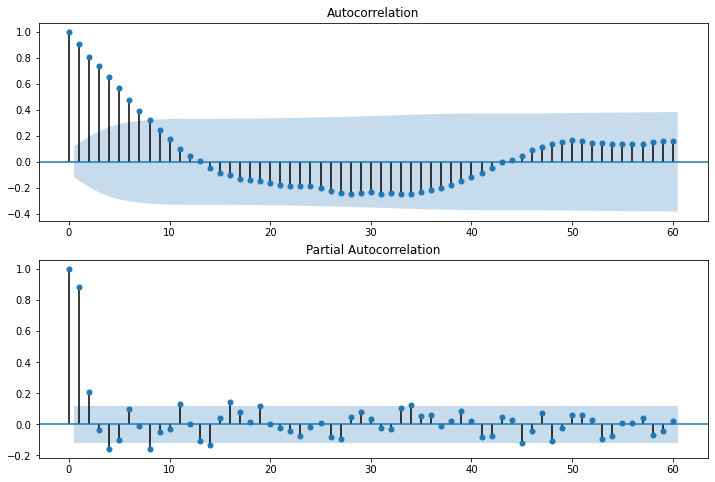

In [20]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataset['Ger_Term'].values.squeeze(), lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataset[ 'cmo'].values, lags=60, ax=ax2)

### Note que há uma forte correlação entre os dados nas semanas iniciais.

## Correlação de Spearman x Pearson
### O objetivo de observar essa correlação é procurar por uma correlação de linearidade nos dados

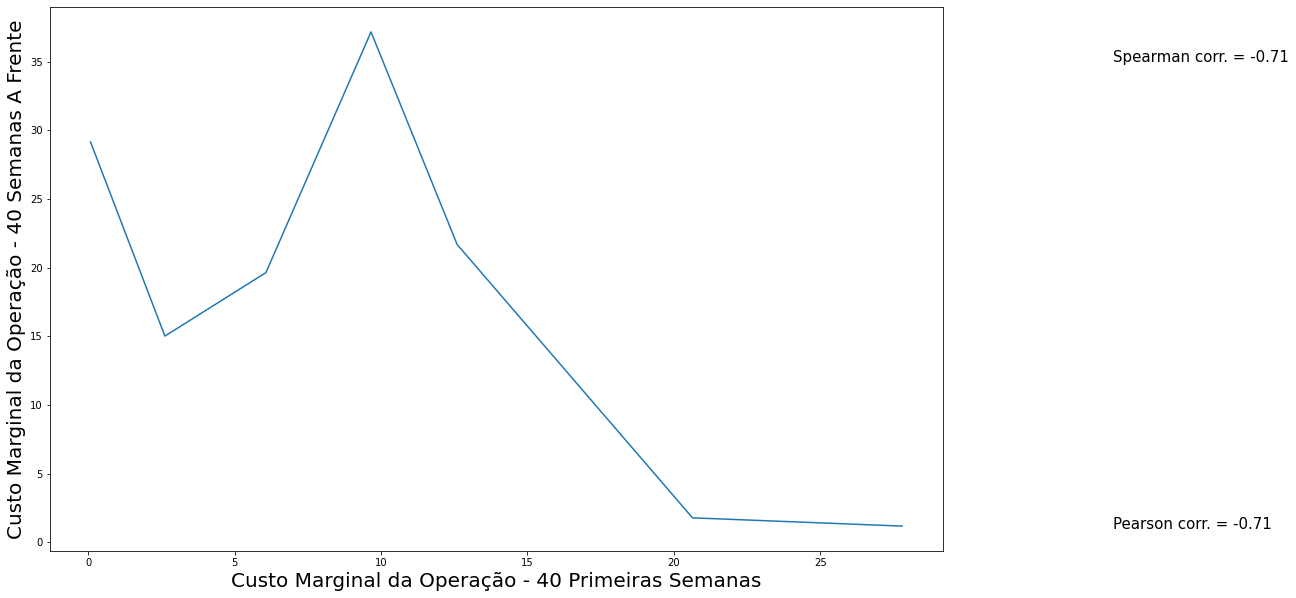

In [21]:
plt.figure(figsize = (16,10))
plt.plot(dataset['cmo'][0:7], dataset['cmo'][7:14])
plt.xlabel("Custo Marginal da Operação - 40 Primeiras Semanas", fontsize = 20)
plt.ylabel("Custo Marginal da Operação - 40 Semanas A Frente", fontsize = 20)
corr, p_value = pearsonr(dataset['cmo'][0:7].values, dataset['cmo'][7:14].values)
corrs, p_values = spearmanr(dataset['cmo'][0:7].values, dataset['cmo'][7:14].values)
corr = int(corr*100)/100
corrs = int(corr*100)/100

string = 'Pearson corr. = ' +str(corr)
plt.text(35,1, string, fontsize= 15)

string = 'Spearman corr. = ' +str(corrs)
plt.text(35,35, string, fontsize= 15)
plt.show()

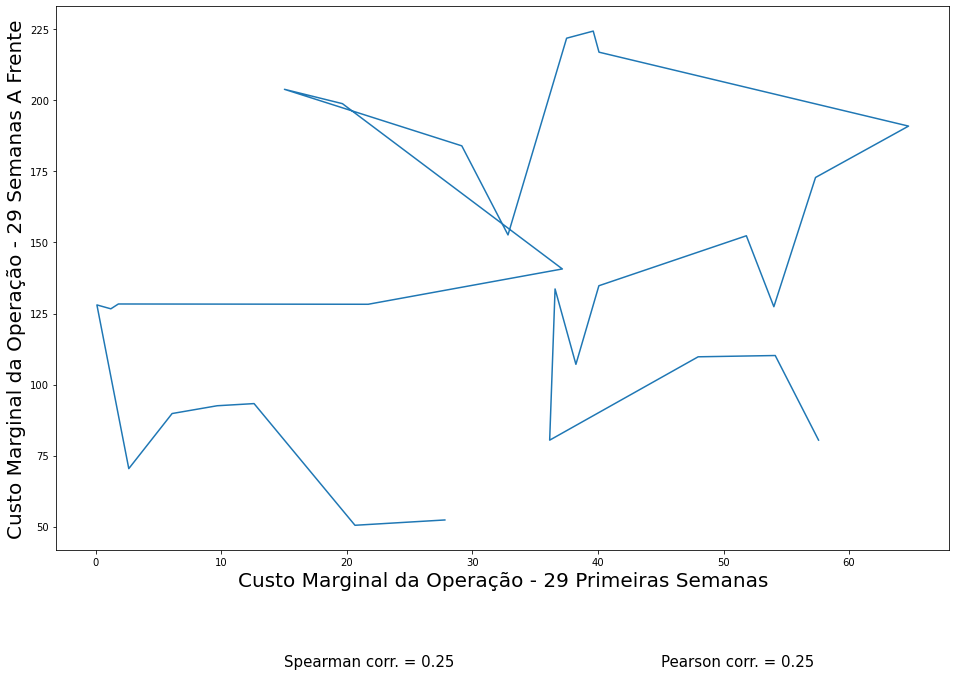

In [22]:
plt.figure(figsize = (16,10))
plt.plot(dataset['cmo'][0:29], dataset['cmo'][29:58])
plt.xlabel("Custo Marginal da Operação - 29 Primeiras Semanas", fontsize = 20)
plt.ylabel("Custo Marginal da Operação - 29 Semanas A Frente", fontsize = 20)
corr, p_value = pearsonr(dataset['cmo'][0:29].values, dataset['cmo'][29:58].values)
corrs, p_values = spearmanr(dataset['cmo'][0:29].values, dataset['cmo'][29:58].values)
corr = int(corr*100)/100
corrs = int(corr*100)/100

string = 'Pearson corr. = ' +str(corr)
plt.text(45,1, string, fontsize= 15)

string = 'Spearman corr. = ' +str(corrs)
plt.text(15,1, string, fontsize= 15)
plt.show()

### > Observamos que a coeficiente de pearson demonstra que não há uma correlação linear entre o cmo das diferentes semanas operativas observadas, porém pode-se inferir um aumento no coeficiente de Pearson quando comparamos um número menor de semanas operativas. Isto porque o coeficiente reflete a correlação com mais propriedade, pois os fenômenos que causam maior impacto na variação do CMO ficam menos parecidos conforme a progressão temporal.

### Separando as variáveis  

### Criando a função de erro:

In [23]:
def rmse(ytrue,ypred):
    return np.sqrt(mean_squared_error(ytrue, ypred))

### Criando o modelo preditivo

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

### Plotando os valores de Y_pred - Y_test

In [26]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.17e+00  6.91e-01]
 [-7.66e-01 -2.16e-01]
 [ 4.47e-02  1.19e+00]
 [-3.37e-01 -8.02e-01]
 [-7.50e-01 -1.15e+00]
 [-8.83e-01 -3.63e-01]
 [-1.09e-01 -2.89e-01]
 [-4.11e-01 -5.38e-01]
 [-3.76e-01 -9.63e-01]
 [-3.74e-01 -1.14e+00]
 [ 1.66e-01  2.67e+00]
 [ 1.26e+00  2.00e+00]
 [-9.14e-01 -2.90e-01]
 [ 7.95e-01  1.64e-01]
 [-1.55e-01  1.87e-01]
 [-5.32e-01 -6.93e-01]
 [-4.71e-01 -1.59e-02]
 [-2.98e-01 -2.28e-01]
 [ 1.59e+00  1.85e+00]
 [-6.28e-02 -1.29e-01]
 [-4.29e-01 -1.15e+00]
 [ 2.74e-01  1.87e+00]
 [-6.75e-01 -6.02e-01]
 [-3.67e-01 -6.35e-01]
 [ 4.84e-01 -4.85e-02]
 [-2.44e-01 -7.49e-01]
 [-6.24e-01 -1.15e+00]
 [-5.03e-01 -6.28e-01]
 [-2.66e-01 -7.35e-02]
 [-8.06e-01 -1.15e+00]
 [ 1.42e-01 -1.15e+00]
 [-7.97e-01 -4.45e-01]
 [ 8.55e-01 -1.62e-03]
 [-5.52e-01 -1.54e-01]
 [ 8.02e-01 -2.77e-02]
 [-9.69e-01 -6.66e-01]
 [ 1.28e+00  1.42e+00]
 [ 4.34e-01  2.19e-01]
 [-5.41e-01 -8.80e-01]
 [-3.20e-01 -3.97e-01]
 [ 6.43e-01  3.97e-01]
 [-7.05e-01 -4.22e-01]
 [ 3.41e-01 -5.08e-01]
 [-4.50e-01

In [27]:
y_pred = y_pred.reshape(len(y_pred),)
y_pred.shape

(54,)

## Estabelecendo as métricas para encontrar os erros

### Calculando o erro quadrático médio RMSE: 

In [28]:
p = y_pred
error = rmse(y_test, p) 
print('Mean Error = % .5f' % np.mean(error))


Mean Error =  0.67899


### MAE - MEAN ABSOLUTE ERROR - ERRO MÉDIO ABSOLUTO 
#### minimizador = mediana / menos preocupado com outliers

In [29]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, p)
print('Mean Error = % .5f' % np.mean(mae))

Mean Error =  0.51542


### Analisando o gráfico do comportamento do CMO com o despacho de termoelétricas 

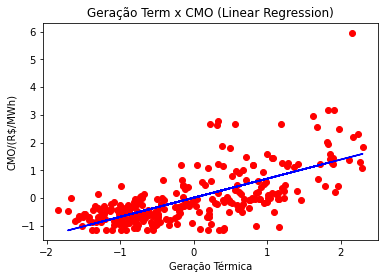

In [30]:
plt.scatter(X_norm, y_norm, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Geração Term x CMO (Linear Regression)')
plt.xlabel('Geração Térmica')
plt.ylabel('CMO/(R$/MWh)')
plt.show()

In [31]:
regressor.predict([[707]])

array([[486.27]])

#### O valor do cmo correpondente a semana operativa em questão corresponde a 175,74 reais

# Modelo de Regressão Não-Linear 
## Treinando o modelo de Regressão Polinomial em Todo o Dataset

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_norm)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_norm) 

LinearRegression()

In [33]:

y_pred_poly = lin_reg_2.predict( poly_reg.fit_transform(X_norm))


In [34]:
p_poly = y_pred_poly

error = rmse(y_norm, p_poly) 
print('Mean Error = % .5f' % np.mean(error))

Mean Error =  0.71174


In [35]:
from sklearn.metrics import mean_absolute_error
mae_poly = mean_absolute_error(y_norm, p_poly)
print('Mean Error = % .5f' % np.mean(mae_poly))

Mean Error =  0.49953


In [36]:
scaler.inverse_transform(lin_reg_2.predict(poly_reg.fit_transform([[(707-dataset['Ger_Term'].mean())/dataset['Ger_Term'].std()]])))

array([[185.34]])

#### O valor do cmo correpondente a semana operativa em questão corresponde a 175,74 reais

## Visualizando os Resultados da Regressão Polinomial

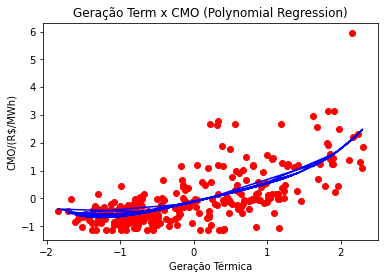

In [37]:
plt.scatter(X_norm, y_norm, color = 'red')
plt.plot(X_norm, lin_reg_2.predict(poly_reg.fit_transform(X_norm)), color = 'blue')
plt.title('Geração Term x CMO (Polynomial Regression)')
plt.xlabel('Geração Térmica')
plt.ylabel('CMO/(R$/MWh)')
plt.show()

## Visualizando os resultados da Regressão Polinomial ( para maior resolução e smooth da curva


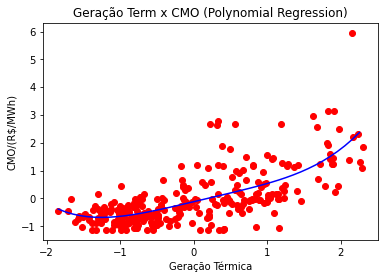

In [38]:
X_grid = np.arange(min(X_norm), max(X_norm), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_norm, y_norm, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Geração Term x CMO (Polynomial Regression)')
plt.xlabel('Geração Térmica')
plt.ylabel('CMO/(R$/MWh)')
plt.show()

In [39]:
res = scaler.inverse_transform(lin_reg_2.predict(poly_reg.fit_transform(X_grid)))

In [40]:
scaler.inverse_transform(lin_reg_2.predict(poly_reg.fit_transform(X_grid)))

array([[153.41],
       [133.01],
       [117.4 ],
       [106.1 ],
       [ 98.65],
       [ 94.6 ],
       [ 93.54],
       [ 95.09],
       [ 98.89],
       [104.61],
       [111.94],
       [120.61],
       [130.36],
       [140.96],
       [152.22],
       [163.97],
       [176.05],
       [188.35],
       [200.77],
       [213.26],
       [225.76],
       [238.27],
       [250.79],
       [263.37],
       [276.08],
       [289.  ],
       [302.25],
       [315.99],
       [330.38],
       [345.62],
       [361.94],
       [379.59],
       [398.84],
       [420.01],
       [443.42],
       [469.43],
       [498.43],
       [530.82],
       [567.05],
       [607.57],
       [652.89],
       [703.51]])

# Adicionando nova váriaveis
### Realizando a regressão linear para o incremento ou decremento de geração térmica

In [41]:
melt = dataset.copy()
melt['Ger_Term_sem-1'] = dataset['Ger_Term'].shift()
melt['Diff_Ger_Term'] = dataset['Ger_Term'].diff()
melt = melt.dropna()
melt.head()

,Semana Operativa,Ger_Term,cmo,Ger_Term_sem-1,Diff_Ger_Term
1,09/01/2016,1009.05,20.64,937.67,71.38
2,16/01/2016,840.08,12.60,1009.05,-168.97
3,23/01/2016,839.19,9.66,840.08,-0.89
4,30/01/2016,764.10,6.07,839.19,-75.09
5,06/02/2016,824.12,2.62,764.10,60.02


## Medindo a correlação entre as váriaveis 

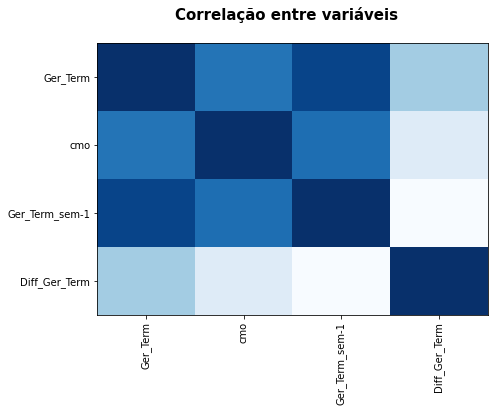

In [42]:
corr = melt.corr()
plt.figure(figsize=(7,5))
plt.imshow(corr, cmap= 'Blues', interpolation='none', aspect= 'auto')
plt.colorbar
plt.xticks(range(len(corr)), corr.columns, rotation= 'vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlação entre variáveis', fontsize = 15, fontweight = 'bold')
plt.grid(False)
plt.show()

In [43]:
melt.reset_index(inplace = True)
melt.set_index('index')
melt.head()

,index,Semana Operativa,Ger_Term,cmo,Ger_Term_sem-1,Diff_Ger_Term
0,1,09/01/2016,1009.05,20.64,937.67,71.38
1,2,16/01/2016,840.08,12.60,1009.05,-168.97
2,3,23/01/2016,839.19,9.66,840.08,-0.89
3,4,30/01/2016,764.10,6.07,839.19,-75.09
4,5,06/02/2016,824.12,2.62,764.10,60.02


### A seguir usamos a função iterrows para percorrer as colunas do dataframe e preencher os valores zerados pela média do valores anterior e posterior

In [44]:
import numpy as np
for index, row in melt.iterrows():
    
     if index > 1:
        if pd.isnull(row['Diff_Ger_Term']):
            melt.loc[index, 'Diff_Ger_Term'] = (melt.loc[index-1,'Diff_Ger_Term']+melt.loc[index-2,  'Diff_Ger_Term'])/2
        else:

             if pd.isnull(row['Diff_Ger_Term']):
                melt.loc[index, 'Diff_Ger_Term'] = (melt.loc[index+2,'Diff_Ger_Term']+melt.loc[index+1,  'Diff_Ger_Term'])/2    

In [45]:
a = melt.iloc[:, 4:5].values
b = melt.iloc[:, 2:3].values

In [46]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(a, b, test_size = 0.2, random_state = 0)

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_1, y_train_1)

LinearRegression()

In [48]:
y_pred_1 = regressor.predict(X_test_1)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.17e+00  6.91e-01]
 [-7.66e-01 -2.16e-01]
 [ 4.47e-02  1.19e+00]
 [-3.37e-01 -8.02e-01]
 [-7.50e-01 -1.15e+00]
 [-8.83e-01 -3.63e-01]
 [-1.09e-01 -2.89e-01]
 [-4.11e-01 -5.38e-01]
 [-3.76e-01 -9.63e-01]
 [-3.74e-01 -1.14e+00]
 [ 1.66e-01  2.67e+00]
 [ 1.26e+00  2.00e+00]
 [-9.14e-01 -2.90e-01]
 [ 7.95e-01  1.64e-01]
 [-1.55e-01  1.87e-01]
 [-5.32e-01 -6.93e-01]
 [-4.71e-01 -1.59e-02]
 [-2.98e-01 -2.28e-01]
 [ 1.59e+00  1.85e+00]
 [-6.28e-02 -1.29e-01]
 [-4.29e-01 -1.15e+00]
 [ 2.74e-01  1.87e+00]
 [-6.75e-01 -6.02e-01]
 [-3.67e-01 -6.35e-01]
 [ 4.84e-01 -4.85e-02]
 [-2.44e-01 -7.49e-01]
 [-6.24e-01 -1.15e+00]
 [-5.03e-01 -6.28e-01]
 [-2.66e-01 -7.35e-02]
 [-8.06e-01 -1.15e+00]
 [ 1.42e-01 -1.15e+00]
 [-7.97e-01 -4.45e-01]
 [ 8.55e-01 -1.62e-03]
 [-5.52e-01 -1.54e-01]
 [ 8.02e-01 -2.77e-02]
 [-9.69e-01 -6.66e-01]
 [ 1.28e+00  1.42e+00]
 [ 4.34e-01  2.19e-01]
 [-5.41e-01 -8.80e-01]
 [-3.20e-01 -3.97e-01]
 [ 6.43e-01  3.97e-01]
 [-7.05e-01 -4.22e-01]
 [ 3.41e-01 -5.08e-01]
 [-4.50e-01

In [49]:
y_pred_1 = y_pred_1.reshape(len(y_pred_1),1)

In [50]:
p_1 = y_pred_1
error = rmse(y_test_1, p_1) 
print('Mean Error = % .5f' % np.mean(error))

Mean Error =  97.50771


In [51]:
erro = (np.abs((y_test_1 - p_1)/p_1))
print('Mean Error = % .5f' % np.mean(erro))

Mean Error =  0.10761


## Modelos de Regressão / Multiplas Variáveis

## Os modelos a seguir tentam prever o Custo Marginal da Operação (CMO) a partir dos dados de geração termoelétrica da região sudeste/ Centro - Oeste e da diferença entre esses dados (incremento ou decremento da geração)

### Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
mean_error = []
for i in range(240,269):
    train = melt[melt['index'].values <= i]
    val = melt[melt['index'].values >= i]
    
    xtr, xts = train.drop(['Semana Operativa', 'cmo'], axis=1), val.drop(['Semana Operativa', 'cmo'], axis=1)
    ytr, yts = train['cmo'].values, val['cmo'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    sem = melt[melt['index'] >= i]['Semana Operativa'].values
    error = rmse(yts, p)
    #print('semana %d - Error %.5f' % (index, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))


Mean Error = 90.85494


In [53]:
sem = melt['Semana Operativa'][239:269].values
mean_error = np.array(mean_error)
mean_error.shape
data = np.concatenate((sem.reshape(len(sem),1), mean_error.reshape(len(mean_error),1)),1)
data.shape

(29, 2)

In [54]:
data = pd.DataFrame(np.array(data).reshape(29,2),columns =["Semana","Erro"])
data.tail()

,Semana,Erro
24,23/01/2021,26.0657
25,30/01/2021,24.494
26,06/02/2021,14.7309
27,13/02/2021,16.9919
28,20/02/2021,7.60288


### Pode-se verificar através da análise do gráfico a seguir que o erro cai muito a partir da semana de 12/12/2020

<Figure size 1080x864 with 0 Axes>

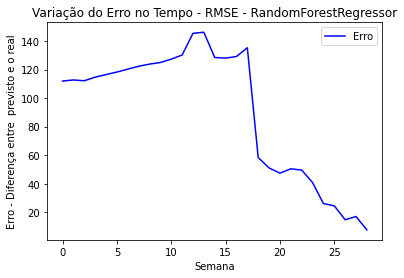

In [55]:
plt.figure(figsize = (15,12))
data.plot(title = 'Variação do Erro no Tempo - RMSE - RandomForestRegressor', color = 'blue')
plt.ylabel('Erro - Diferença entre  previsto e o real')
plt.xlabel('Semana')
plt.show()

### Regressão Linear Múltipla

In [56]:
mean_error = []
for index in range(240,269):
    train = melt[melt['index'] < index]
    val = melt[melt['index'] >= index]
    
    xtr, xts = train.drop(['Semana Operativa', 'cmo'], axis=1), val.drop(['Semana Operativa', 'cmo'], axis=1)
    ytr, yts = train['cmo'].values, val['cmo'].values
    
    mdl = LinearRegression()
    
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    error = rmse(yts, p)
    print('semana %d - Error %.5f' % (index, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))


semana 240 - Error 327.56735
semana 241 - Error 330.51090
semana 242 - Error 334.47270
semana 243 - Error 339.29903
semana 244 - Error 343.74258
semana 245 - Error 349.02054
semana 246 - Error 353.89022
semana 247 - Error 393.89830
semana 248 - Error 518.54929
semana 249 - Error 377.70094
semana 250 - Error 372.01698
semana 251 - Error 398.48279
semana 252 - Error 347.10732
semana 253 - Error 286.73089
semana 254 - Error 244.48942
semana 255 - Error 250.02926
semana 256 - Error 224.50615
semana 257 - Error 213.99022
semana 258 - Error 219.92911
semana 259 - Error 149.48425
semana 260 - Error 111.97206
semana 261 - Error 91.81689
semana 262 - Error 80.41859
semana 263 - Error 61.87239
semana 264 - Error 39.24848
semana 265 - Error 15.26660
semana 266 - Error 16.37361
semana 267 - Error 16.77404
semana 268 - Error 152.88031
Mean Error = 240.07039
